In [26]:
# -*- coding:utf8 -*-

from text_clustering import *
from text_clustering import text_clustering
from networkx.drawing.nx_agraph import graphviz_layout
from wordcloud import WordCloud 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

set_ch()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 第一步：读入数据

In [10]:
expense_items=pd.read_csv('data.csv',usecols=['项目类别','项目名称'])
expense_items.head(5)

,项目类别,项目名称
0,其他费,术前12小时禁饮食
1,其他费,流食
2,其他费,肝肾功
3,其他费,输血前四项
4,其他费,心电图 胸腹平片 腹部B超


(-0.5, 1919.5, 1079.5, -0.5)

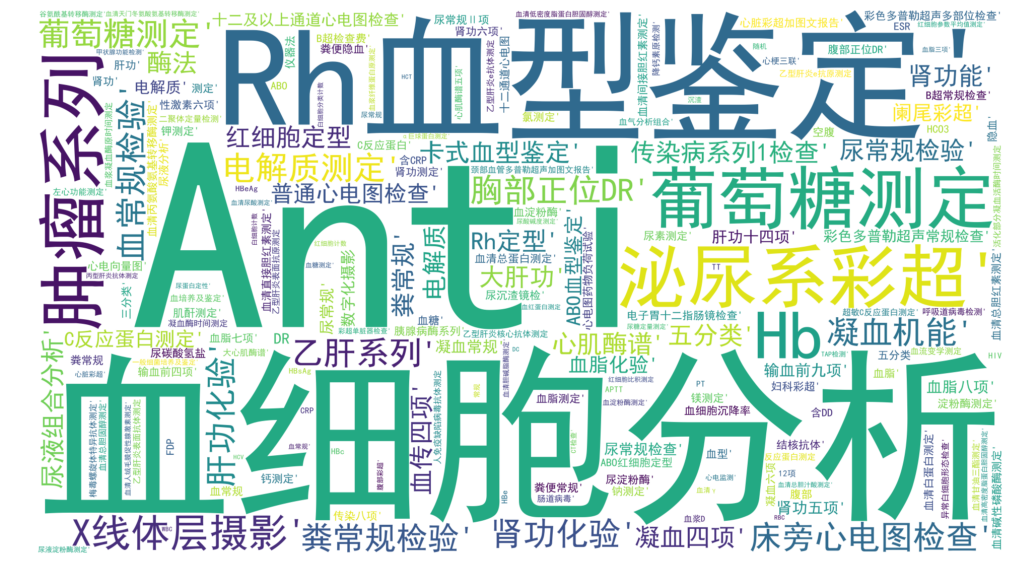

In [13]:
items=expense_items[(expense_items['项目类别']=='检查费') | (expense_items['项目类别']=='化验费')]['项目名称'].unique().tolist()
wordcloud = WordCloud('simhei.ttf',\
                      width=1920,height=1080,background_color='white').generate(str(items))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,10)) # create the axes
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")

# 第二步：通过分词词频筛选停用词

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/bz/q2rh195d1knbj1fd0wf0yxfw0000gn/T/jieba.cache
Loading model cost 2.092 seconds.
Prefix dict has been built succesfully.


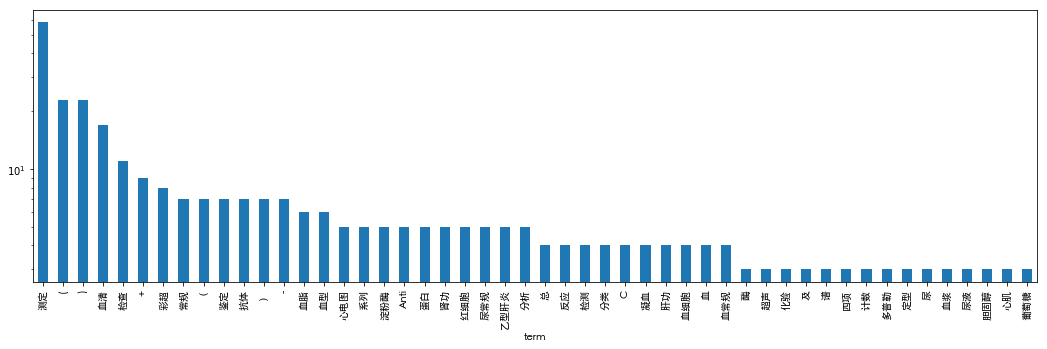

In [14]:
explore_stop_words(items,count=50)

# 第三步：进行层次聚类
根据前一步中高频词分析，去除无实际意义的停用词（不作为聚类分析的词）。

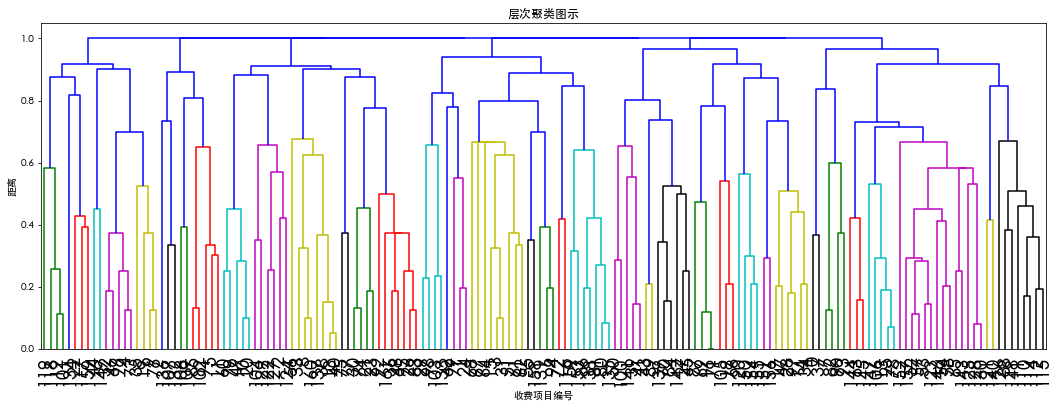

In [16]:
stopwords=set(['测定','分析','检查','检验','化验','鉴定'])
tc=text_clustering(items,stopwords)
tc.hierarchy_clustering()

# 第四步：根据不同的需求选择参数并得到结果

In [30]:
tc.ge

In [17]:
G=tc.get_clustering_result(0.3)

97
163
42


In [35]:
cluster_result=[]
cluster=fcluster(tc.Z, 0.3, criterion='distance')
for i in range(0, len(cluster)-1):
    cluster_result.append([cluster[i], tc.items[i]])

cluster_df=distance_df=pd.DataFrame(cluster_result, columns=['cluster_id','医嘱项目'])
cluster_df_gb=cluster_df.groupby('cluster_id').count()
print(cluster_df_gb[cluster_df_gb['医嘱项目']>1]['医嘱项目'].sum())
print(len(tc.items))
cluster_index=cluster_df_gb[cluster_df_gb['医嘱项目']>1].sort_values(by='医嘱项目', ascending=False).index.values
print(len(set(cluster_index)))

for i in cluster_index:
    print(cluster_df[cluster_df['cluster_id']==i]['医嘱项目'].values)

97
163
42
['血清直接胆红素测定' '血清总胆红素测定' '血清间接胆红素测定' '血清总胆固醇测定' '血清总胆汁酸测定']
['C反应蛋白测定' 'C反应蛋白' 'C—反应蛋白测定(CRP)' '超敏C反应蛋白测定']
['心肌酶谱' '大心肌酶谱' '心肌酶谱五项']
['肾功化验' '肾功' '肾功测定']
['血细胞分析+五分类' '血细胞分析+三分类' '血细胞分析（五分类）']
['血淀粉酶' '尿淀粉酶' '血淀粉酶测定']
['粪常规检验' '粪常规' '粪常规+隐血']
['红细胞计数(RBC)' '白细胞计数(WBC)' '白细胞分类计数(DC)']
['尿常规检验' '尿常规' '尿常规检查']
['血脂化验' '血脂' '血脂测定']
['ABO血型鉴定' 'ABO+RH血型鉴定']
['尿液组合分析' '尿液分析']
['红细胞比积测定(HCT)' '红细胞参数平均值测定']
['红细胞定型+Rh定型' 'ABO红细胞定型+Rh血型鉴定']
['血清丙氨酸氨基转移酶测定' '血清天门冬氨酸氨基转移酶测定']
['卡式血型鉴定' 'Rh血型鉴定']
['胸部正位DR' '腹部正位DR']
['腹部+泌尿系彩超' '泌尿系彩超']
['血清总蛋白测定' '血清白蛋白测定']
['血清碱性磷酸酶测定' '血清胆碱脂酶测定']
['血清低密度脂蛋白胆固醇测定' '血清高密度脂蛋白胆固醇测定']
['乙型肝炎核心抗体测定(Anti-HBc)' '乙型肝炎表面抗体测定(Anti-HBs)']
['阑尾彩超' '妇科彩超']
['心脏彩超加图文报告' '颈部血管多普勒超声加图文报告']
['B超检查费' 'B超常规检查']
['彩色多普勒超声常规检查' '彩色多普勒超声多部位检查']
['肝功化验' '肝功']
['肿瘤系列(男)' '肿瘤系列(女)']
['粪便常规' '粪便隐血']
['凝血酶时间测定(TT)' '血浆凝血酶原时间测定(PT)']
['血常规检验' '血常规']
['输血前九项' '输血前四项']
['凝血四项' '血传四项']
['血脂八项' '血脂七项']
['十二及以上通道心电图检查' '十二通道心电图+心电向量图']
['血培养及鉴定' '一般细菌培养及鉴定']
['床旁心电图检查' '普通心电图检查']
['电解

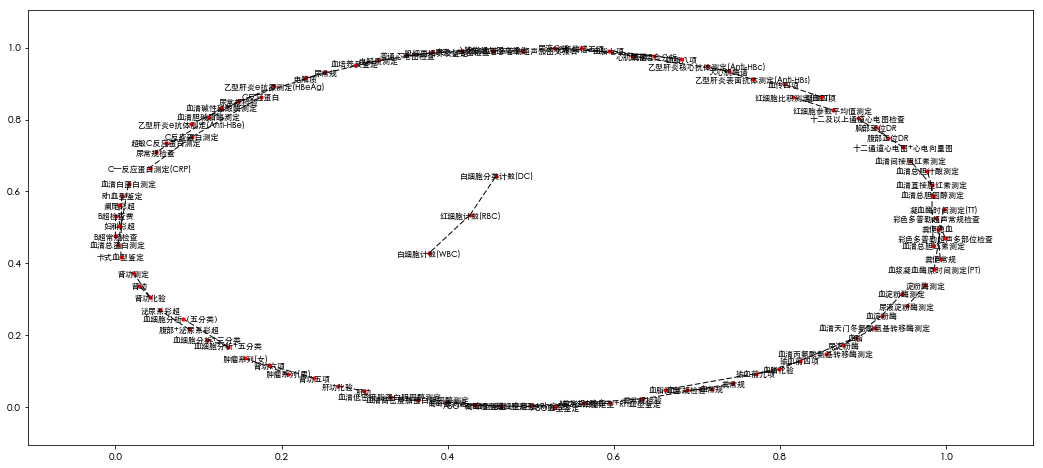

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,8)) # create the axes
#pos=graphviz_layout(G)
nx.draw_networkx(G, with_labels=True,node_size=10, font_size=8, ax=ax, style='dashed')